##Installing dependencies


In [ ]:
!pip install kaggle

In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade tensorflow

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

#Importing and managing datasets

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p '/content/New Plant Diseases Dataset(Augmented)'

100% 2.70G/2.70G [00:29<00:00, 83.1MB/s]
100% 2.70G/2.70G [00:29<00:00, 97.4MB/s]


In [6]:
import zipfile

zip_file_path="/content/New Plant Diseases Dataset(Augmented)/new-plant-diseases-dataset.zip"
extract_path="/content/extracted plant disease dataset"

with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow



import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import seaborn as sns




In [8]:
import gradio as gr

In [9]:
len(os.listdir('/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

#1st Model

#Data Preprocessing

In [10]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)


In [11]:
train=train_datagen.flow_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=(256,256),
                                        batch_size=32)
val=val_datagen.flow_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',target_size=(256,256),
                                        batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [12]:
t_img,label=train.next()

In [13]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

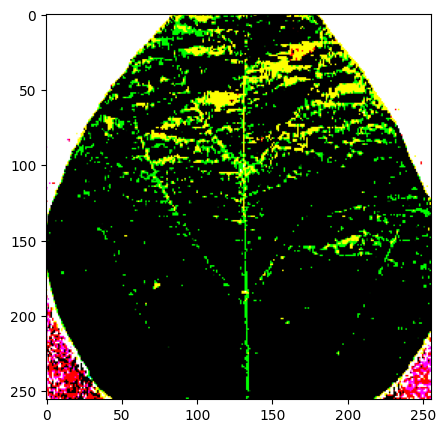

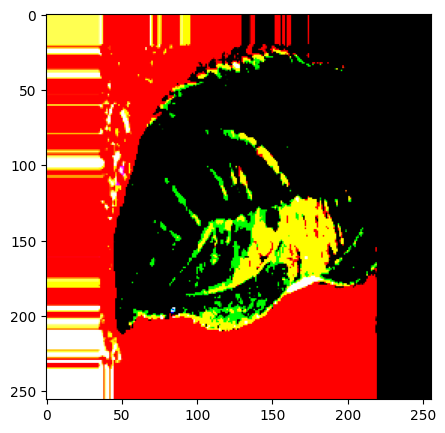

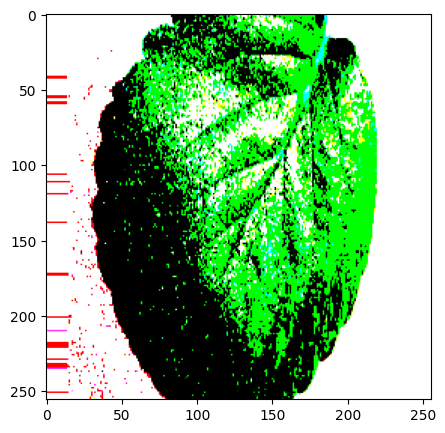

In [14]:
plotImage(t_img[:3],label[:3])

In [15]:
from keras.layers import Dense,Flatten
from keras.models import Model

In [16]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [17]:
for layer in base_model.layers:
  layer.trainable=False

In [18]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

#Creating model

In [19]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

# Creating our model

model=Model(base_model.input, X)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

#Model Training

In [21]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1)

mc=ModelCheckpoint(filepath='/content/best_model.h5',monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)

cb=[es,mc]

In [23]:
his=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=64)

<ipython-input-23-36e9dc5be89f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=64)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 25.4655 - accuracy: 0.1777
Epoch 1: val_accuracy improved from -inf to 0.42090, saving model to /content/best_model.h5
16/16 [==============================] - 48s 2s/step - loss: 25.4655 - accuracy: 0.1777 - val_loss: 14.0140 - val_accuracy: 0.4209
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.9248 - accuracy: 0.3926
Epoch 2: val_accuracy improved from 0.42090 to 0.57373, saving model to /content/best_model.h5
16/16 [==============================] - 24s 2s/step - loss: 13.9248 - accuracy: 0.3926 - val_loss: 9.8821 - val_accuracy: 0.5737
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.7037 - accuracy: 0.5059
Epoch 3: val_accuracy improved from 0.57373 to 0.57422, saving model to /content/best_model.h5
16/16 [==============================] - 24s 2s/step - loss: 11.7037 - accuracy: 0.5059 - val_loss: 9.7281 - val_accuracy: 0.5742
Epoch 4/50
16/16 [========================

In [24]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

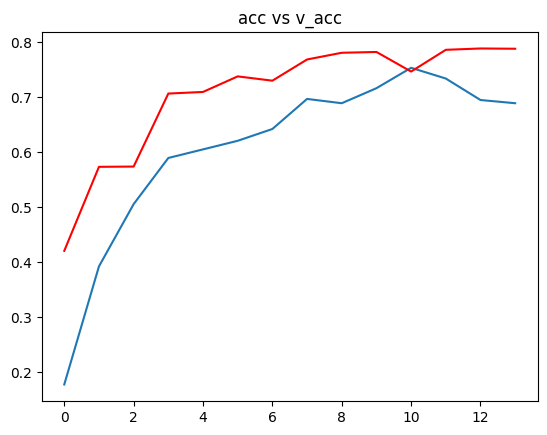

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v_acc')
plt.show()

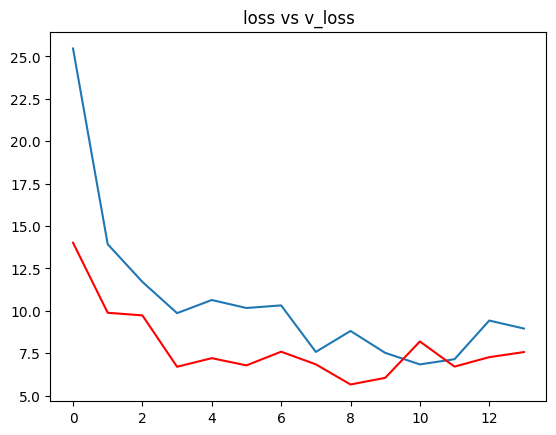

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v_loss')
plt.show()

In [27]:
from keras.models import load_model

model=load_model('/content/best_model.h5')

In [28]:
acc=model.evaluate(val)[1]
# acc=model.evaluate(val)
print(f'The models accuracy is = {acc*100}%')

550/550 [==============================] - 117s 211ms/step - loss: 7.6622 - accuracy: 0.7700
The models accuracy is = 76.9974946975708%


In [ ]:
dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

#Model Testing


In [ ]:
# def prediction(path):
#   img=load_img(path,target_size=(256,256))
#   i=img_to_array(img)
#   im=preprocess_input(i)
#   img=np.expand_dims(im,axis=0)
#   pred=np.argmax(model.predict(img))
#   print(f'The image belongs to {ref[pred]}')

In [ ]:
# path='/content/extracted plant disease dataset/test/test/CornCommonRust2.JPG'
# prediction(path)

1/1 [==============================] - 1s 663ms/step
The image belongs to Corn_(maize)___Common_rust_


In [32]:
# image='/content/extracted plant disease dataset/test/test/CornCommonRust2.JPG'
# def preprocess_image(image):
#     # Convert image to NumPy array
#     image_array = np.array(image)
#     # Perform any necessary preprocessing on the image_array
#     # For example, you might normalize the pixel values or resize the image
#     processed_image = keras.applications.vgg19.preprocess_input(image_array)
#     return processed_image

# # Define a function to make predictions
# def predict(image):
#     # Preprocess the image
#     processed_image = preprocess_image(image)
#     # Reshape the image if needed (depending on the input shape of your model)
#     # processed_image = processed_image.reshape((1, height, width, channels))
#     # Make predictions using your model
#     predictions = model.predict(processed_image)
#     # Post-process the predictions if needed
#     # For example, you might convert probabilities to class labels
#     return postprocess(predictions)

# # Create a Gradio interface
# image_input = gr.inputs.Image()
# label_output = gr.outputs.Label()
# interface = gr.Interface(fn=predict, inputs=image_input, outputs=label_output)

# # Launch the interface
# interface.launch(debug=True)
model=load_model('/content/best_model.h5')

from PIL import Image

def predict(image):
    img = Image.fromarray(np.uint8(image))
    img = img.resize((256, 256))
    img_arr = keras.applications.vgg19.preprocess_input(np.array(img))
    img_arr = np.expand_dims(img_arr, axis=0)
    pred = model.predict(img_arr)
    label = ref[np.argmax(pred)]
    return label

input_image=gr.inputs.Image()
output_label=gr.outputs.Textbox(label='Predicted Label')
interface=gr.Interface(fn=predict,inputs=input_image,outputs=output_label)

interface.launch(debug=True)

<ipython-input-32-07655718744e>:42: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  input_image=gr.inputs.Image()
<ipython-input-32-07655718744e>:42: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  input_image=gr.inputs.Image()
<ipython-input-32-07655718744e>:43: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  output_label=gr.outputs.Textbox(label='Predicted Label')


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


#2nd model

#Importing Modules

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization


In [ ]:
import warnings
warnings.filterwarnings('ignore')
tensorflow.compat.v1.set_random_seed(0)
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from  sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

#Data Preprocessing

In [ ]:
train_gen=image_dataset_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',image_size=(256,256))
test_gen=image_dataset_from_directory(directory='/content/extracted plant disease dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',image_size=(256,256))

rescale=Rescaling(scale=1.0/255)
train_gen=train_gen.map(lambda image,label:(rescale(image),label))
test_gen=test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


#Modelling

In [ ]:
model=Sequential()
# Layer 1
model.add(keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(3,3))

# layer 2
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))

model.add(keras.layers.Conv2D(512,(5,5),padding='same',activation='relu'))
model.add(keras.layers.Conv2D(512,(5,5),padding='same',activation='relu'))

model.add(Flatten())

model.add(Dense(1568,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(38,activation='softmax'))

In [ ]:
opt=keras.optimizers.Adam(learning_rate=(0.0001))

model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
history=model.fit_generator(train_gen,validation_data=test_gen,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 376s 167ms/step - loss: 1.5323 - accuracy: 0.5516 - val_loss: 0.5185 - val_accuracy: 0.8383
Epoch 2/10
2197/2197 [==============================] - 365s 166ms/step - loss: 0.4307 - accuracy: 0.8633 - val_loss: 0.2973 - val_accuracy: 0.9031
Epoch 3/10
2197/2197 [==============================] - 350s 159ms/step - loss: 0.2474 - accuracy: 0.9194 - val_loss: 0.2053 - val_accuracy: 0.9309
Epoch 4/10
2197/2197 [==============================] - 349s 159ms/step - loss: 0.1714 - accuracy: 0.9435 - val_loss: 0.1847 - val_accuracy: 0.9386
Epoch 5/10
2197/2197 [==============================] - 349s 159ms/step - loss: 0.1266 - accuracy: 0.9576 - val_loss: 0.1752 - val_accuracy: 0.9458
Epoch 6/10
2197/2197 [==============================] - 364s 165ms/step - loss: 0.0995 - accuracy: 0.9671 - val_loss: 0.1220 - val_accuracy: 0.9601
Epoch 7/10
2197/2197 [==============================] - 365s 166ms/step - loss: 0.0799 - accuracy: 0.9735 - val_

#Visualization

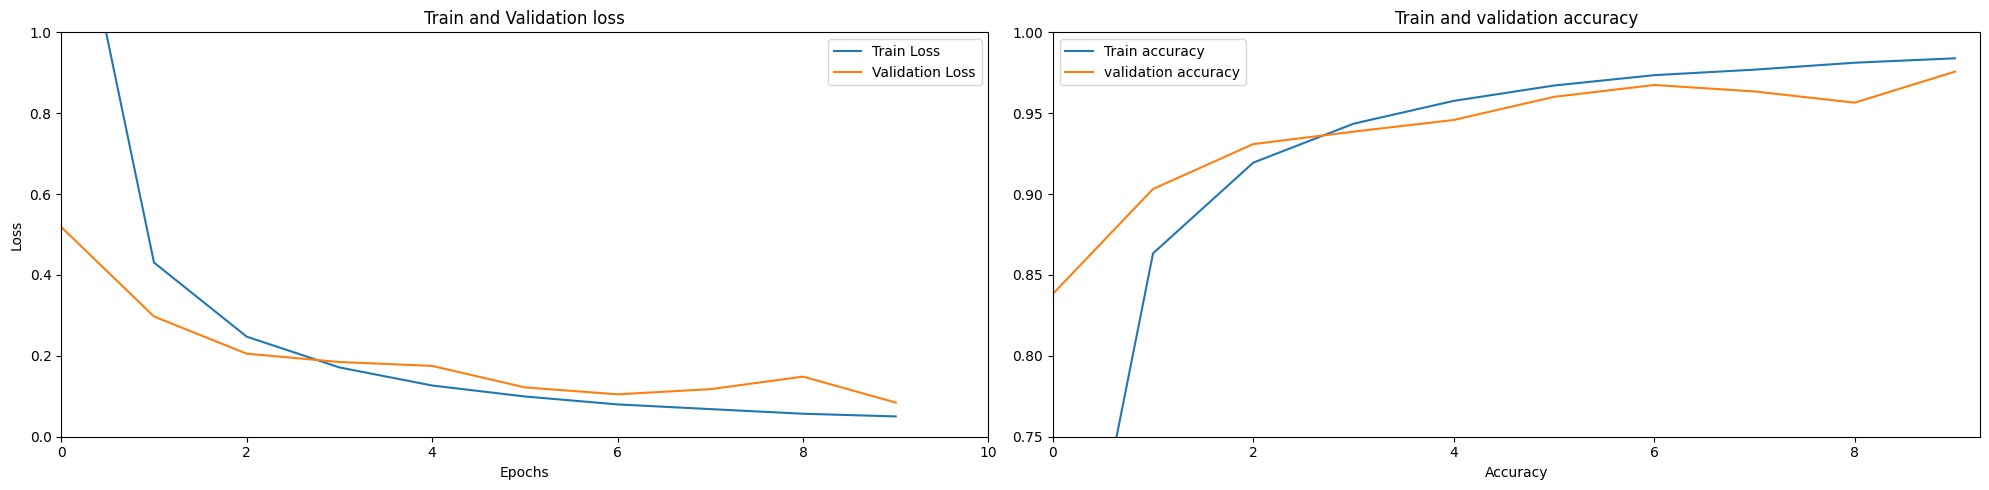

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Train and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlim(0,10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlim(0,9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels=[]
predictions=[]
for x,y in test_gen:
  labels.append(list(y.numpy()))
  predictions.append(tensorflow.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 219ms/step


In [ ]:
predictions=list(itertools.chain.from_iterable(predictions))
labels=list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train accuracy:{:.2f}%".format(history.history['accuracy'][-1]*100))
print("Test accuracy:{:.2f}%".format(accuracy_score(labels,predictions)*100))
print("Recall Score:{:.2f}%".format(recall_score(labels,predictions,average='micro')*100))
print("Precision Score:{:.2f}%".format(precision_score(labels,predictions,average='micro')*100))

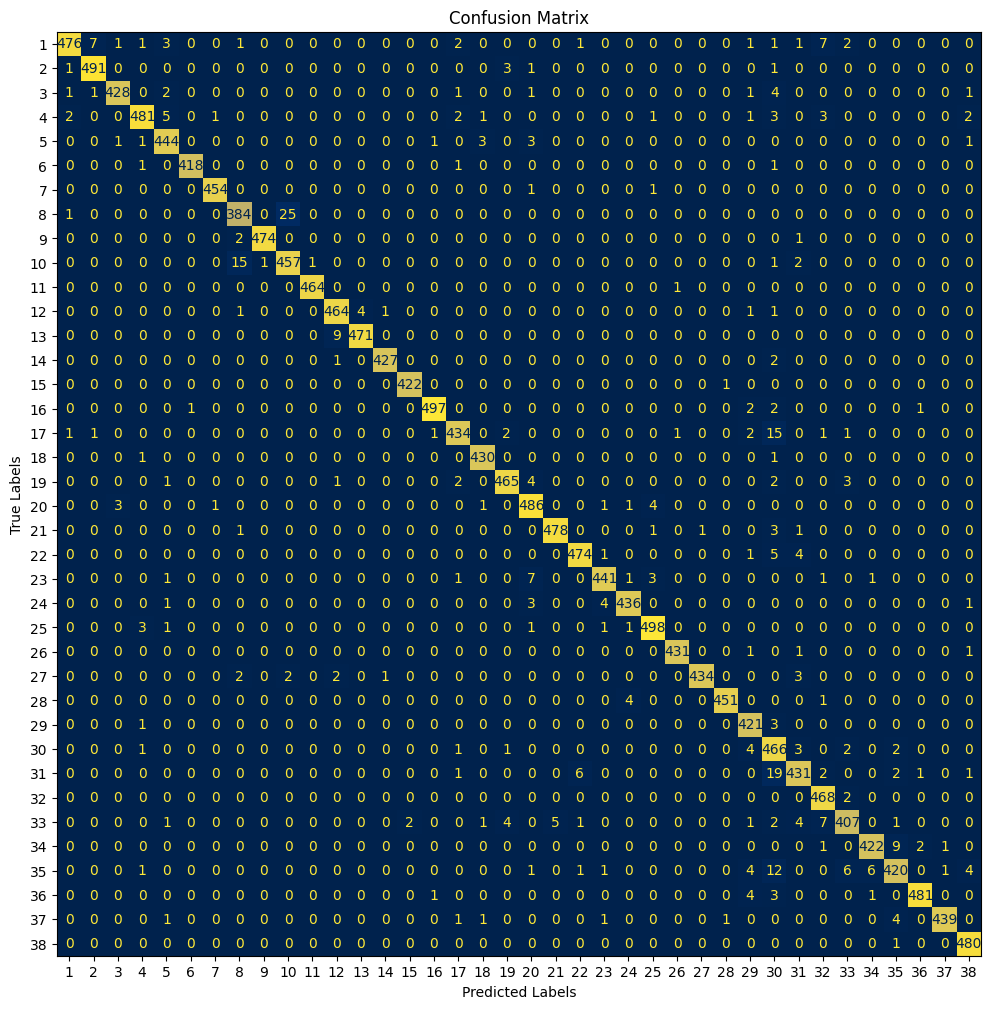

In [ ]:
# plt.figure(figsize=(20,5))
cm=confusion_matrix(labels,predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(1,39)))
fig,ax=plt.subplots(figsize=(13,12))
disp.plot(ax=ax,colorbar=False,cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

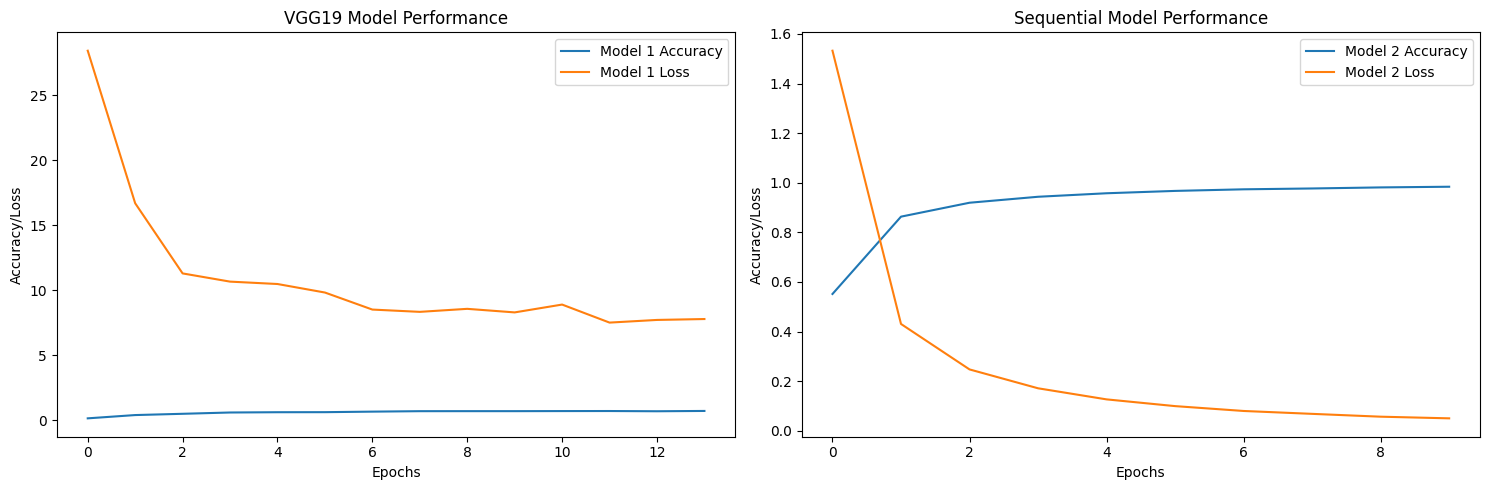

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(his.history['accuracy'], label='Model 1 Accuracy')
axes[0].plot(his.history['loss'], label='Model 1 Loss')

axes[1].plot(history.history['accuracy'], label='Model 2 Accuracy')
axes[1].plot(history.history['loss'], label='Model 2 Loss')

axes[0].set_title('VGG19 Model Performance')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy/Loss')
axes[0].legend()

axes[1].set_title('Sequential Model Performance')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy/Loss')
axes[1].legend()



fig.tight_layout()
# Show the plot
plt.show()